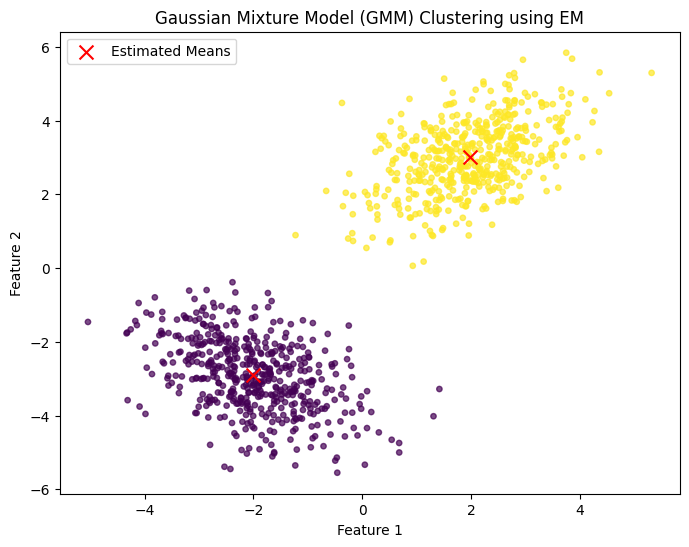

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data from a mixture of two Gaussians
np.random.seed(42)
N = 1000

# Initialize GMM parameters
K = 2  # Number of clusters

# Define parameters for two Gaussian distributions
mean1 = [2, 3]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [-2, -3]
cov2 = [[1, -0.5], [-0.5, 1]]

# Sample data from both Gaussians
data1 = np.random.multivariate_normal(mean1, cov1, N // 2)
data2 = np.random.multivariate_normal(mean2, cov2, N // 2)

# Combine data
X = np.vstack((data1, data2))


np.random.seed(42)
means = np.random.randn(K, 2)  # Random initialization of means
covariances = np.array([np.eye(2) for _ in range(K)])  # Identity matrices
weights = np.ones(K) / K  # Equal weights

# E-M Algorithm
def gaussian_pdf(x, mean, cov):
    d = x.shape[0]
    coeff = 1 / (np.sqrt((2 * np.pi) ** d * np.linalg.det(cov)))
    exponent = np.exp(-0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean))
    return coeff * exponent

num_iters = 100
for _ in range(num_iters):
    # E-step: Compute responsibilities
    responsibilities = np.zeros((N, K))
    for i in range(N):
        for j in range(K):
            responsibilities[i, j] = weights[j] * gaussian_pdf(X[i], means[j], covariances[j])
        responsibilities[i, :] /= np.sum(responsibilities[i, :])
    
    # M-step: Update parameters
    N_k = np.sum(responsibilities, axis=0)
    weights = N_k / N
    means = (responsibilities.T @ X) / N_k[:, np.newaxis]
    
    for j in range(K):
        diff = X - means[j]
        covariances[j] = (responsibilities[:, j][:, np.newaxis] * diff).T @ diff / N_k[j]

# Predict cluster assignments
labels = np.argmax(responsibilities, axis=1)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15, alpha=0.7)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Estimated Means')
plt.title("Gaussian Mixture Model (GMM) Clustering using EM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
